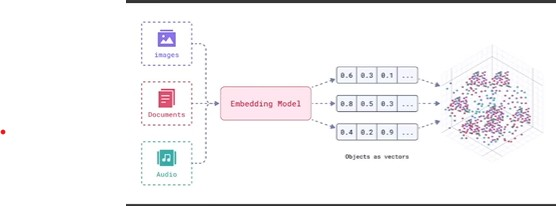

In [ ]:
from PIL import Image
Image.open(r'/content/embedding_models.jpg')

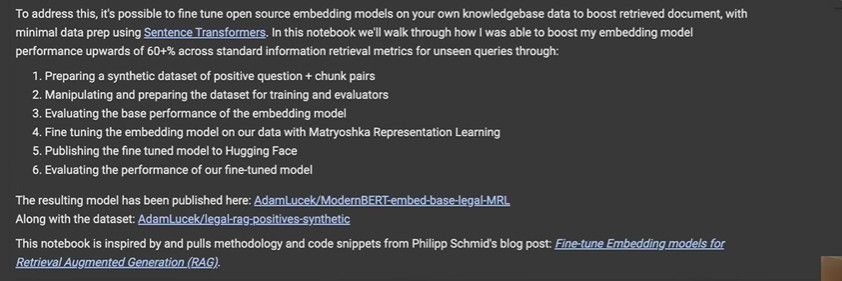

In [ ]:
from PIL import Image
Image.open(r'/content/to.jpg')

In [ ]:
from huggingface_hub import login
login(token=user.data.get('HF_TOKEN'))

In [ ]:
## Dataset Preparation

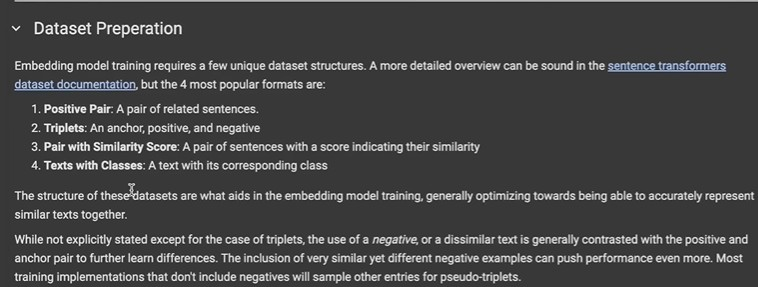

In [ ]:
Image.open(r'/content/DATASET_PREPARATION.jpg')

In [ ]:
dataset=load_dataset("AdamLucek/legal-rag-positives-synthetic",split="train")

In [ ]:
## clean and format columns

In [ ]:
dataset=dataset.rename("question","anchor")


In [ ]:
## shuffle dataset
dataset=dataset.shuffle()
## split dataset into 90 10
dataset=dataset.train_test_split(test_size=0.1)
dataset["train"].to_json("train.json",orient="records")
dataset["test"].to_json("test.json",orient="records")

In [ ]:
## Base Model Evaulation and Matyroshka Dimensions

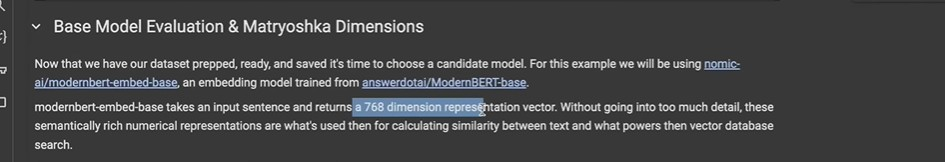

In [ ]:
Image.open(r'/content/Base_Model_Evaluation.jpg')

In [ ]:
model_id="nomic-modrenbert-embed-base"
model=SequenceTransformer(model_id,device="cuda" if torch.cuda.is_available() else "cpu")


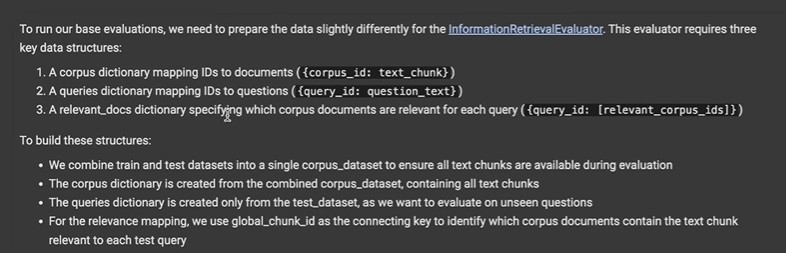

In [ ]:
Image.open(r'/content/Base_evaluations.jpg')

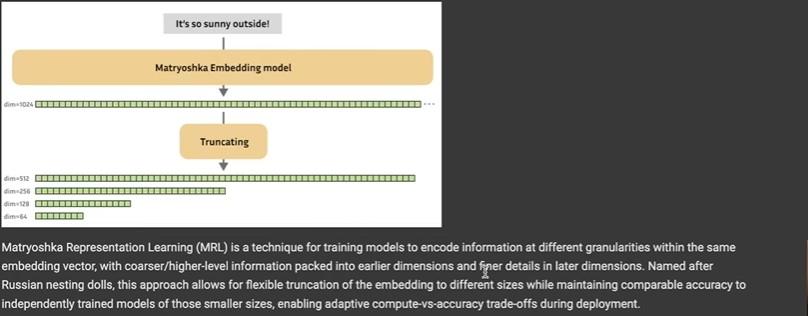

In [ ]:
from PIL import Image
Image.open(r'/content/Matry_representation.jpg')

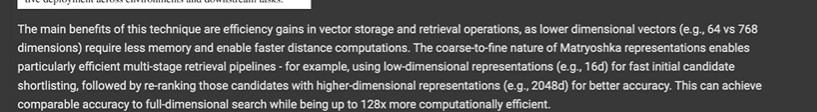

In [ ]:
Image.open(r'/content/Benefits.jpg')

In [ ]:
## Dimension of Intrest

In [ ]:
Matyroshka_representation=[768,512,256,128,64]
##empty list to hold evaluators
matrykosha_evaluators=[]
for dim in matryoksha_dimension:
  ## define the evaluator
  ir_evaluator=InformationRetrievalEvaluator(queries=queries,corpus=corpus,relevant_docs=relevant_docs,name=f"dim_{dim}",truncate_dim=dim,score_functions={"cosine":cos_sim})
  ## add to list
  matrykosha_evaluators.append(ir_evaluator)
  ## create a sequential evaluator
  evaluator=SequentialEvaluator(matrykosha_evaluators)

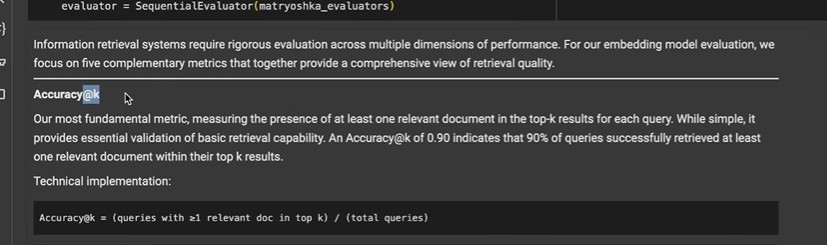

In [ ]:
Image.open(r'/content/metrics.jpg')

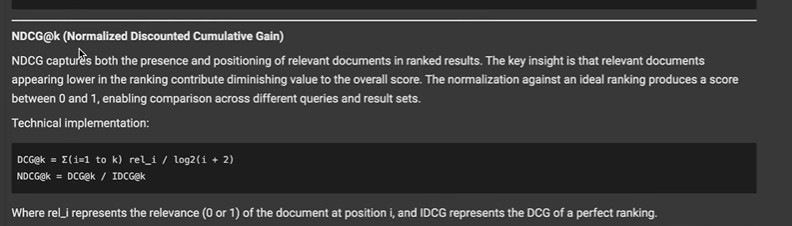

In [ ]:
Image.open(r'/content/metrics_2.jpg')

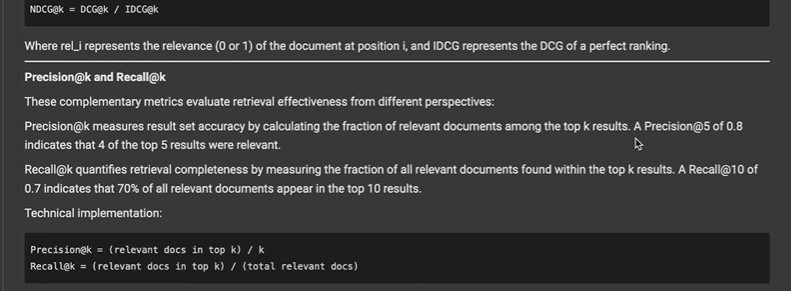

In [ ]:
Image.open(r'/content/precision_k.jpg')

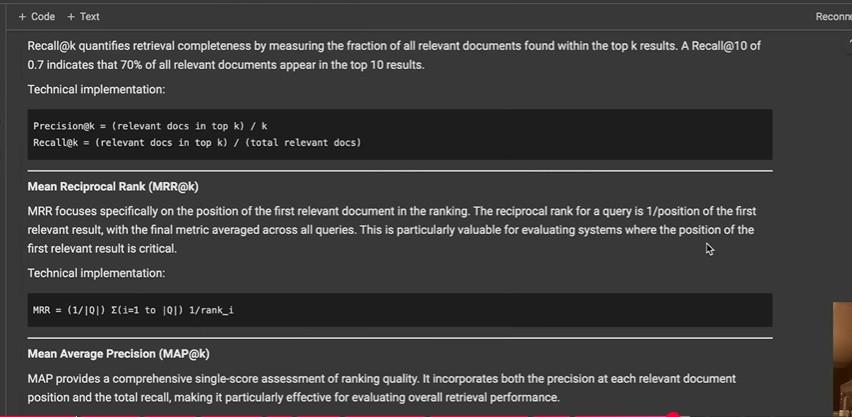

In [ ]:
Image.open(r'/content/metrics_3.jpg')

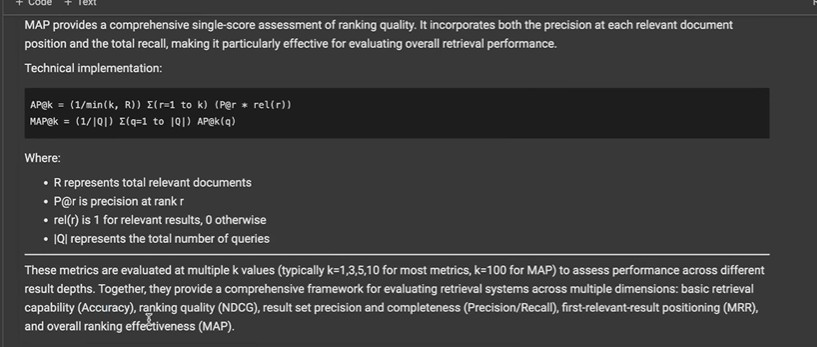

In [ ]:
Image.open(r'/content/metrics_4.jpg')

In [ ]:
## evaluate the model

In [ ]:
base_results=evaluator(model)
##print header
print("\n Base Model evaluation metrics")
print("-"*85)
## List of metrics to display
metrics=[]

In [ ]:
## Training

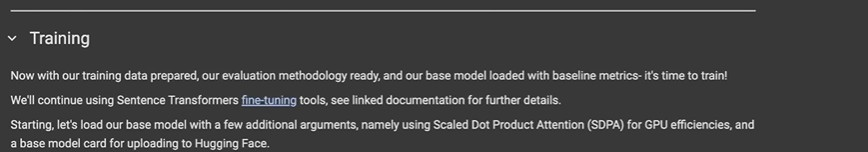

In [ ]:
Image.open(r'/content/training.jpg')

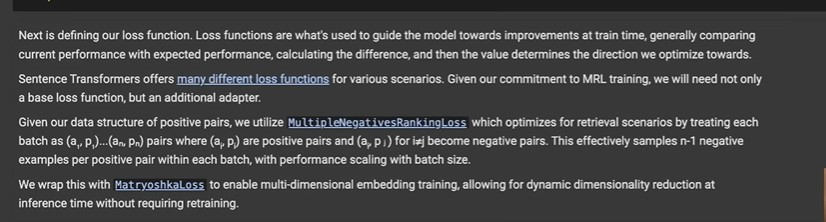

In [ ]:
from PIL import Image
Image.open(r'/content/loss_function.jpg')

In [ ]:
model=SentenceTransformer(model_kwargs={"attn_implementation":"sdpa"},model_card_data=SentenceTransformerModelCardData(language="en",license="apache-2.0",model_name=model_id,model_name='ModrenBert Embed Base Legal Matryoksha'))


In [ ]:
#Inital loss
base_loss=MultipleNegativesRankingLoss(model=model)
##Matryoshka Loss
train_loss=MatyroshkaLoss(model=model,base_loss,matryoshka_dims=matryoksha_dims)


In [ ]:
## Below are the hyperparamemters

In [ ]:
## Training Args
args=SentenceTransformerTrainingArguments(output_dir="modrenbert-embed-base-legal-matryoshka-lucek",num_train_epochs=4,per_device_train_batch_size=32,
                                          gradient_accumulation_steps=16,warmup_ration=0.1,
                                          tf32=True,bf16=True,optim="adamw_torch_fused",
                                          batch_sampler=BatchSamplers.NO_DUPLICATES,eval_stratergy="epoch",
                                          save_stratergy="epoch",logging_steps=10,save_total_limit=3,
                                          load_best_model_at_end=True,
                                          metric_for_best_model="eval_dim_128_cosine_ndcg@10",report_to="none")

In [ ]:
## Finally Package our Model,training arguments,dataset,loss function and evaluator together into SentenceTransformerTrainer

In [ ]:
trainer=SentenceTransformerTrainng(model=model,args=args,train_dataset=train_dataset.select_columns(["positive","anchor"],loss=train_loss,evaluator=evaluator))

In [ ]:
## start the training run

In [ ]:
trainer.train()
## save the best model based on our eval_dim_!28_cosine_ndcg@10 criteria
trainer.save_model()


In [ ]:
## optionally save the model to the hugging face

In [ ]:
trainer.model.push_to_hub("modren-bert-embed-base-legal-matryoskha3")

In [ ]:
## evaluate the traiing model

In [ ]:
fine_tuned_model=SentenceTransformer(args.output_dir,device="cuda" if torch.cuda.is_available() else "cpu")
## evaluate the model
ft_results=evaluator(fine_tuned_model)
##print header
print("\n Fine Tuned Model evaluation metrics")
print("-"*85)
## List of metrics to display
print(f"{'Metric:15'}{'768d':12}{'512d':>12}{'256d':>12}{'128d':>12}{'64d':>12}")
print("-"*85)
metrics=['ndcg@10','mrr@10',
         'accuracy@1','accuracy@3','accuracy@5','accuracy@10','precision@1','precision@3','precision@5','precison@10','recall@1','recall@3','recall@4','recall@10']
##print each metric
for metric in metrics:
  values=[]
  for dim in matryoksha_dimension:
    key=f"dim_{dim}_cosine_{metric}"
    values.append(ft_results[key])
    ## Higlight NDCG@10
    metric_name=f"=={metric}==" if metric=="ndcg@10" else "metric"
    print(f"{metric_name:15}",end=" ")
    for val in values:
      print(f"{val:12.4f}",end=" ")
    print()
##print sequential score
print("-"*85)
print(f"{'seq_score:'} {ft_results['sequential_score']:1f}")



In [ ]:
## Training components
##1. Dataset
##2. Loss Function
## 3.Training Arguments
##4.Evaluator
##5.Trainer

In [ ]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer("modren-bert-embed-base-legal-matryoskha3",truncat_dim=256)


In [ ]:
sentences=[]
embeddings=model.encode(sentences)
print(embedding.shape)
## get the similarity score
similarites=model.similarity(embeddings,embeddings)
print(similarites[0])